In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

import data
import train
import plot

/home/maarten/Documents/masterthesis/supervised


In [2]:
num_clusters = 3

files = [f'../clusterlabeled-{num_clusters}/1800{i}.xml' for i in [1, 2, 3, 4, 5]]
dataset = data.GermanDatasetInMemory(files, num_clusters, 100, 1000, 3, 0)

Loading samples:  21%|██        | 7469/35764 [00:41<02:37, 179.45it/s]


Training: 100%|██████████| 100/100 [00:48<00:00,  2.06it/s, loss=15.4, Δloss=1.94] 


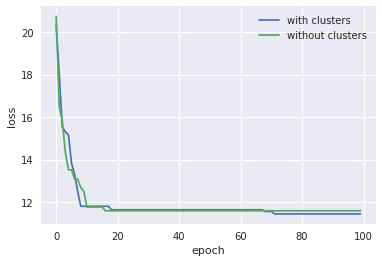

In [3]:
params = train.CNNParams(
    embed_size=128,
    dropout=0.5,
    epochs=100,
    num_filters=64
)

label_model, label_losses = train.setup_and_train(params, with_labels=True, dataset=dataset, batch_size=32)
model, losses = train.setup_and_train(params, with_labels=False, dataset=dataset, batch_size=32)
plot.plot({'with clusters': label_losses, 'without clusters': losses}, True)

In [9]:
train.evaluate_clf(model, data.get_iterator(dataset, [40]))
train.evaluate_clf(label_model, data.get_iterator(dataset, [40]))


----------------  --------
f1                0.966184
Speech recall     1
Speech precision  0.934579
----------------  --------

----------------  --------
f1                0.990099
Speech recall     1
Speech precision  0.980392
----------------  --------


(0.9803921568627451, 1.0, 0.99009900990099)

In [ ]:
params = train.RNNParams(
    embed_size=128,
    dropout=0.5,
    epochs=100,
    hidden_size=64,
    num_layers=1
)

label_model, label_losses = train.setup_and_train(params, with_labels=True, dataset=dataset, batch_size=32)
model, losses = train.setup_and_train(params, with_labels=False, dataset=dataset, batch_size=32)
plot.plot({'with clusters': label_losses, 'without clusters': losses}, True)